<a href="https://colab.research.google.com/github/alikaz3mi/Biostatistical_Analysis/blob/main/BiostatisticalAnalysis_HW1_AliKazemi_9813174.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ali Kazemi   9813174   Biostatistical Analysis HW1

In [93]:
#@title Dependecies
%%capture
%matplotlib inline
!pip install stemgraphic
import pandas as pd
import plotly.express as px
import plotly
import statsmodels as sm
import numpy as np
from stemgraphic.num import stem_graphic

!git clone -l -s https://github.com/alikaz3mi/Biostatistical_Analysis.git cloned-repo
%cd /content/cloned-repo/Homeworks/Data/Excel

# 1) Hypertension

### import dataset

In [94]:
hypertension = pd.read_excel('Hypertension_P1.xlsx', index_col=0)
pd.options.display.width = 1200
pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 100
print('Table: \n',hypertension.head())
print('\n\n Table statistical parameters: \n',hypertension.describe())

Table: 
    Rec_side_systol  Rec_side_diastol  stand_heart_systol  stand_heart_diastol
1               99                71                 105                   79
2              126                74                 124                   76
3              108                72                 102                   68
4              122                68                 114                   72
5              104                64                  96                   62


 Table statistical parameters: 
        Rec_side_systol  Rec_side_diastol  stand_heart_systol  stand_heart_diastol
count        32.000000         32.000000            32.00000            32.000000
mean        117.406250         73.968750           108.59375            73.031250
std          12.788249          8.464287            15.13138            10.501872
min          92.000000         58.000000            88.00000            56.000000
25%         108.000000         70.000000            96.00000            67.000

## a- arithmetic mean and median

In [95]:
Systolic = hypertension[['Rec_side_systol']].subtract(hypertension['stand_heart_systol'], axis=0)
Diastol = hypertension[['Rec_side_diastol']].subtract(hypertension['stand_heart_diastol'], axis=0)
print('Systolic mean = {mean} \n Systolic median = {median}'.format(mean=Systolic.mean()['Rec_side_systol'], median=Systolic.median()['Rec_side_systol']))
print('\n\n\nDiastol mean = {mean} \n Diastol median = {median}'.format(mean=Diastol.mean()['Rec_side_diastol'], median=Diastol.median()['Rec_side_diastol']))


Systolic mean = 8.8125 
 Systolic median = 8.0



Diastol mean = 0.9375 
 Diastol median = 1.0


## b- stem-and-leaf and boxplot

**Systol**

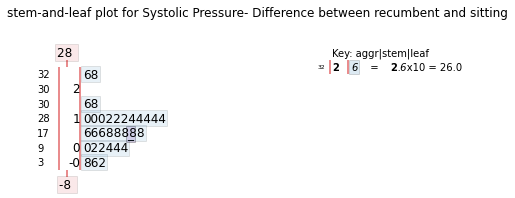

In [96]:
#@title Systol stem-and-leaf
fig, ax = stem_graphic(Systolic['Rec_side_systol'],  
                       title='stem-and-leaf plot for Systolic Pressure- Difference between recumbent and sitting')

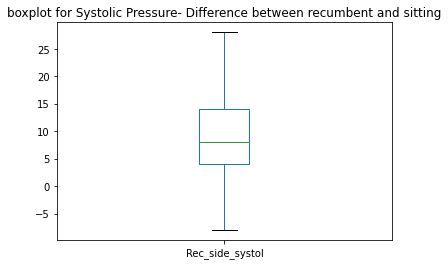

In [97]:
#@title Systol boxplot
axis = Systolic['Rec_side_systol'].plot(kind='box', title='boxplot for Systolic Pressure- Difference between recumbent and sitting')

**Diastol**

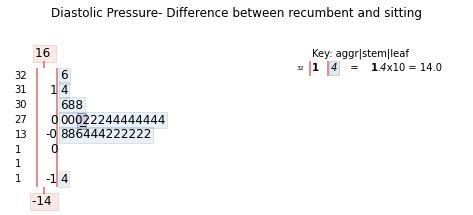

In [98]:
#@title Diastol stem-and-leaf
fig, ax = stem_graphic(Diastol['Rec_side_diastol'],  
                       title='Diastolic Pressure- Difference between recumbent and sitting')

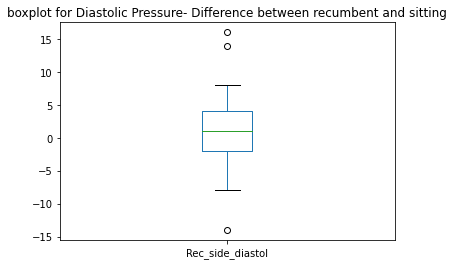

In [99]:
#@title Diastol boxplot
ax = Diastol['Rec_side_diastol'].plot(kind='box', title='boxplot for Diastolic Pressure- Difference between recumbent and sitting')

## c-
mean(diff_systolic) > 0:

    Systolic blood pressure is higher in the recumbent position than in the standing position.
 
mean(diff_diastol) > 0:

    Difference between recumbent and standing position is .8. Thus, one could neglict the effect of body position on Diastolic blood pressure. Moreover, the distribution seems to be symmetric (mean~=median).

## d-
The normal age should between Q1 and Q3

In [100]:
#@title Normal range for systolic and diastolic pressure
print('Systolic normal range = [{Q1}  -  {Q3}]'.format(Q1=Systolic.quantile(.25)['Rec_side_systol'], Q3=Systolic.quantile(.75)['Rec_side_systol']))
print('\n\n\nDiastolic normal range = [{Q1}  -  {Q3}]'.format(Q1=Diastol.quantile(.25)['Rec_side_diastol'], Q3=Diastol.quantile(.75)['Rec_side_diastol']))

Systolic normal range = [4.0  -  14.0]



Diastolic normal range = [-2.0  -  4.0]


# 2) FEV

### import dataset

In [123]:
FEV = pd.read_excel('FEV.DAT.xls')
FEV.head(10)

,Id,Age,FEV,Hgt,Sex,Smoke
0,301,9,1.708,57.0,0,0
1,451,8,1.724,67.5,0,0
2,501,7,1.720,54.5,0,0
3,642,9,1.558,53.0,1,0
4,901,9,1.895,57.0,1,0
5,1701,8,2.336,61.0,0,0
6,1752,6,1.919,58.0,0,0
7,1753,6,1.415,56.0,0,0
8,1901,8,1.987,58.5,0,0
9,1951,9,1.942,60.0,0,0


In [119]:
FEV.Sex.value_counts()

male      336
female    318
Name: Sex, dtype: int64

## a-

In [108]:
#@title numeric descriptive statistics
FEV[['Age', 'Hgt', 'FEV', 'Smoke', 'Sex']].describe(include='all')

,Age,Hgt,FEV,Smoke,Sex
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,9.931193,61.143578,2.636780,0.099388,0.513761
std,2.953935,5.703513,0.867059,0.299412,0.500193
min,3.000000,46.000000,0.791000,0.000000,0.000000
25%,8.000000,57.000000,1.981000,0.000000,0.000000
50%,10.000000,61.500000,2.547500,0.000000,1.000000
75%,12.000000,65.500000,3.118500,0.000000,1.000000
max,19.000000,74.000000,5.793000,1.000000,1.000000


Histogram, scatter plots, and barplots for smokers and non-smokers


<Figure size 2160x2160 with 0 Axes>

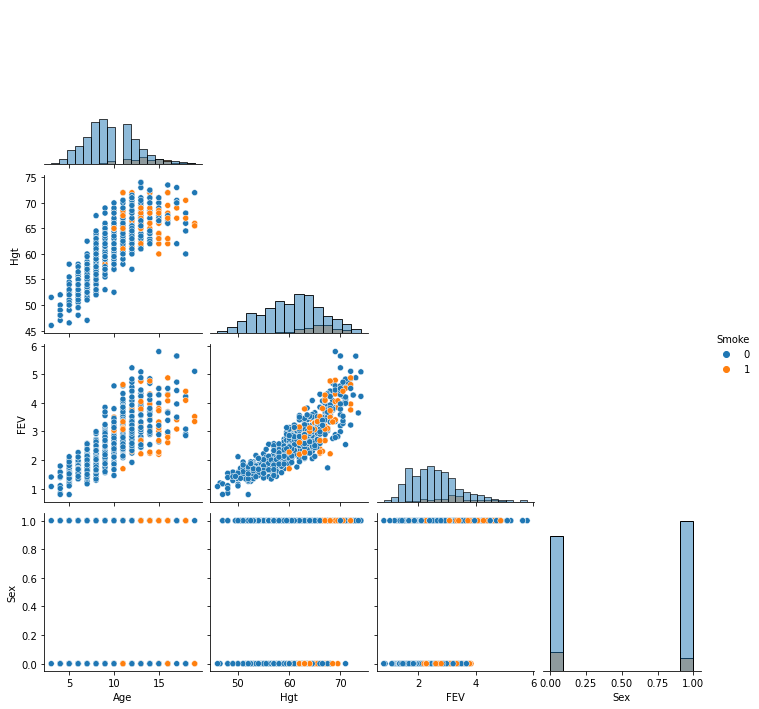

In [124]:
#@title graphical descriptive statistics
import seaborn as sns
import matplotlib.pyplot as plt
table = FEV.copy()
table = table[['Age', 'Hgt', 'FEV', 'Smoke', 'Sex']]
plt.figure(figsize=(30, 30))
print('Histogram, scatter plots, and barplots for smokers and non-smokers')
ax = sns.pairplot(table,  hue='Smoke', diag_kind='hist', corner=True)

Histogram, scatter plots and barplots based on sex


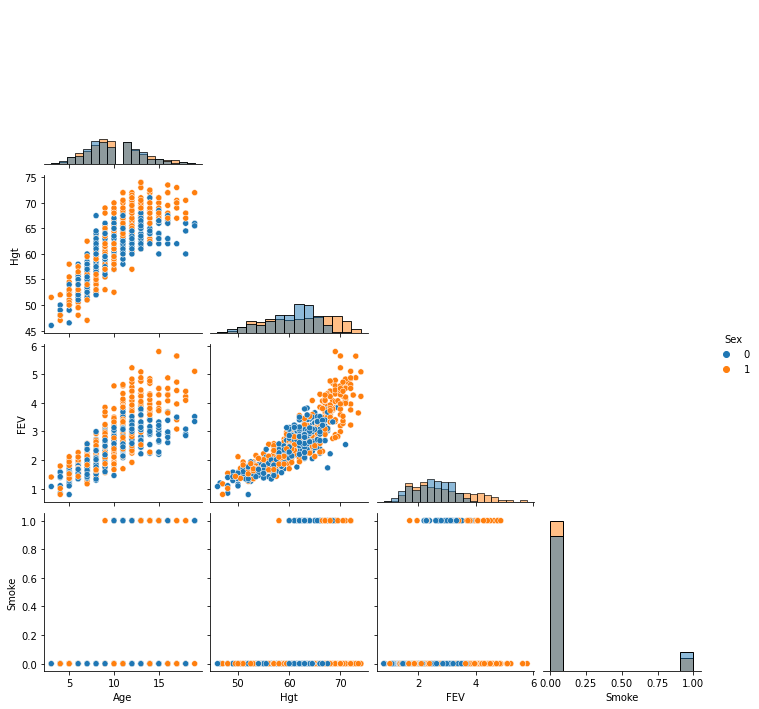

In [125]:
print('Histogram, scatter plots and barplots based on sex')
ax = sns.pairplot(table,  hue="Sex", diag_kind="hist", corner=True)

## b-

### boys

In [130]:
FEV_boys = FEV.query('Sex == "1"')
FEV_boys.head()

,Id,Age,FEV,Hgt,Sex,Smoke
3,642,9,1.558,53.0,1,0
4,901,9,1.895,57.0,1,0
11,2001,8,1.735,54.0,1,0
13,2401,8,2.118,60.5,1,0
14,3102,8,2.258,58.0,1,0


In [139]:
FEV_boys.describe()

,Id,Age,FEV,Hgt,Sex,Smoke
count,336.000000,336.000000,336.000000,336.000000,336.0,336.000000
mean,36232.541667,10.014881,2.812446,62.025298,1.0,0.077381
std,23700.518224,2.975986,1.003598,6.330696,0.0,0.267593
min,201.000000,3.000000,0.796000,47.000000,1.0,0.000000
25%,15316.750000,8.000000,2.008500,57.000000,1.0,0.000000
50%,34171.000000,10.000000,2.606000,62.000000,1.0,0.000000
75%,52286.000000,12.000000,3.534750,67.500000,1.0,0.000000
max,90001.000000,19.000000,5.793000,74.000000,1.0,1.000000


Histogram, scatter plots and barplots for men


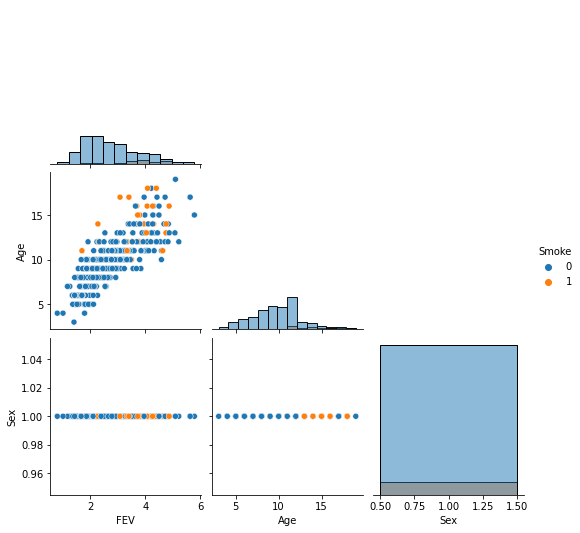

In [149]:
print('Histogram, scatter plots and barplots for men')
ax = sns.pairplot(FEV_boys[['FEV', 'Age', 'Sex', 'Smoke']],  hue="Smoke", diag_kind="hist", corner=True)

### Girls

In [146]:
FEV_girls = FEV.query('Sex == "0"')
FEV_girls.head()

,Id,Age,FEV,Hgt,Sex,Smoke
0,301,9,1.708,57.0,0,0
1,451,8,1.724,67.5,0,0
2,501,7,1.720,54.5,0,0
5,1701,8,2.336,61.0,0,0
6,1752,6,1.919,58.0,0,0


In [147]:
FEV_girls.describe()

,Id,Age,FEV,Hgt,Sex,Smoke
count,318.000000,318.000000,318.000000,318.000000,318.0,318.000000
mean,38159.641509,9.842767,2.451170,60.211950,0.0,0.122642
std,23677.620645,2.932543,0.645736,4.791842,0.0,0.328542
min,301.000000,3.000000,0.791000,46.000000,0.0,0.000000
25%,16913.500000,8.000000,1.948500,57.500000,0.0,0.000000
50%,38476.500000,10.000000,2.486000,61.000000,0.0,0.000000
75%,54738.500000,12.000000,2.991750,63.500000,0.0,0.000000
max,83952.000000,19.000000,3.835000,71.000000,0.0,1.000000


Histogram, scatter plots and barplots for women


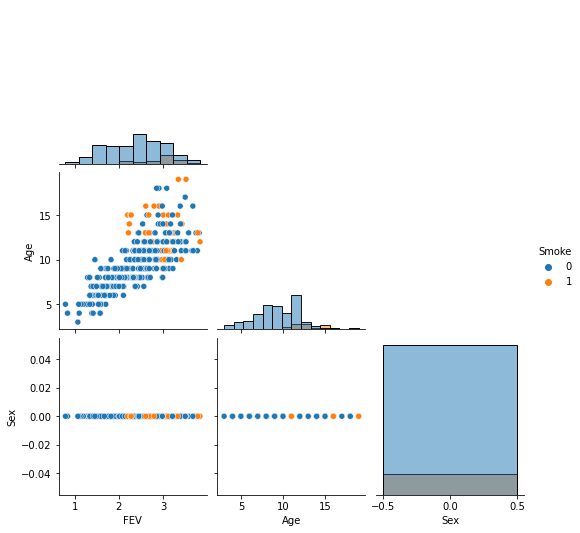

In [150]:
print('Histogram, scatter plots and barplots for women')
ax = sns.pairplot(FEV_girls[['FEV', 'Age', 'Sex', 'Smoke']],  hue="Smoke", diag_kind="hist", corner=True)

## c-

Scatterplot of FEV vs. Age:

     FEV increases with age for both boys and girls (linear relationship).

# 3) Nutrition

### import dataset

In [152]:
Nutrition = pd.read_excel('VALID.DAT.xls')
Nutrition.head()

,Id,sfat_dr,sfat_ffq,tfat_dr,tfat_ffq,alco_dr,alco_ffq,cal_dr,cal_ffq
0,100396,33.20,21.2,81.15,53.8,8.26,1.68,1807,1242.2
1,100566,17.73,10.6,53.28,36.6,0.83,0.00,1418,907.0
2,107633,38.73,23.8,83.48,47.2,20.13,15.10,1889,786.0
3,107737,21.57,22.7,49.65,55.3,11.16,7.49,1426,1392.5
4,107744,21.35,30.4,55.18,71.0,7.18,12.84,1253,1259.8


## a-

### Numerical descriptive statistics

In [157]:
Nutrition[Nutrition.columns[1:]].describe(include='all')

,sfat_dr,sfat_ffq,tfat_dr,tfat_ffq,alco_dr,alco_ffq,cal_dr,cal_ffq
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,24.931734,21.915607,68.615376,56.076879,8.962948,8.951329,1619.872832,1371.730058
std,6.772596,9.275395,16.290839,21.970692,9.664045,12.254817,323.411603,482.053536
min,11.820000,5.600000,35.900000,14.800000,0.000000,0.000000,910.000000,463.200000
25%,20.200000,15.600000,56.160000,40.800000,1.760000,0.760000,1418.000000,1035.500000
50%,24.160000,19.900000,68.280000,51.700000,5.840000,4.550000,1606.000000,1297.600000
75%,28.260000,25.800000,77.980000,68.000000,12.970000,11.860000,1781.000000,1589.600000
max,46.360000,57.400000,119.830000,133.500000,49.150000,64.750000,2518.000000,3077.300000


### Graphical descriptive statistics

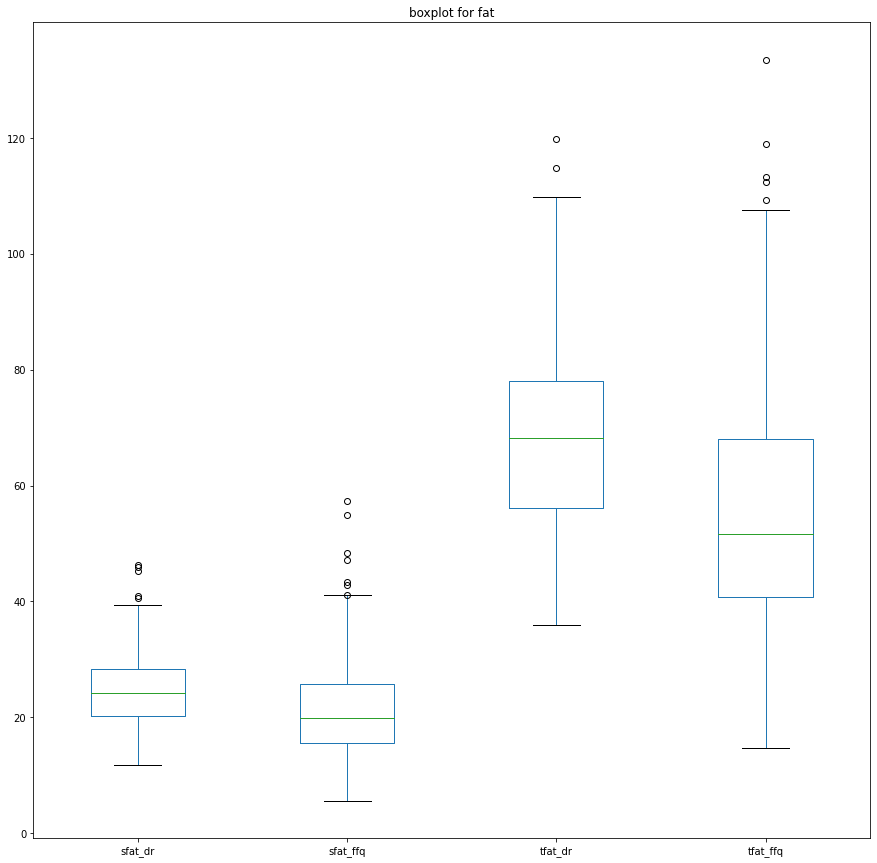

In [171]:
axis = Nutrition[Nutrition.columns[1:5]].plot(kind='box', title='Boxplots for fat', figsize=(15, 15))

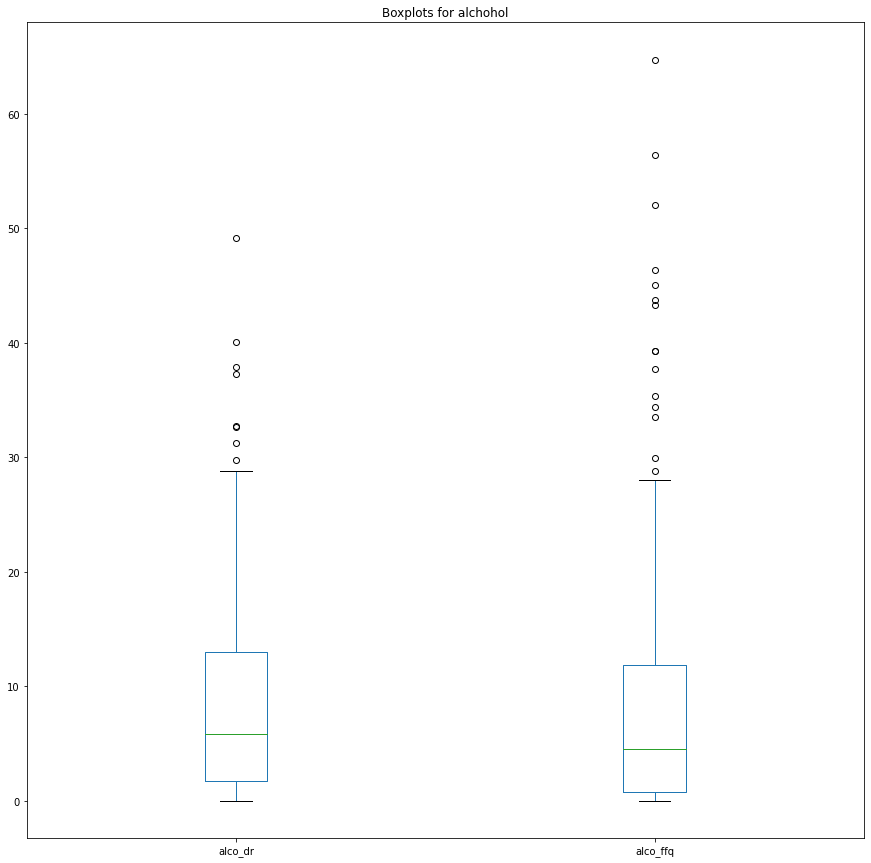

In [174]:
axis = Nutrition[Nutrition.columns[5:7]].plot(kind='box', title='Boxplots for alchohol', figsize=(15, 15))

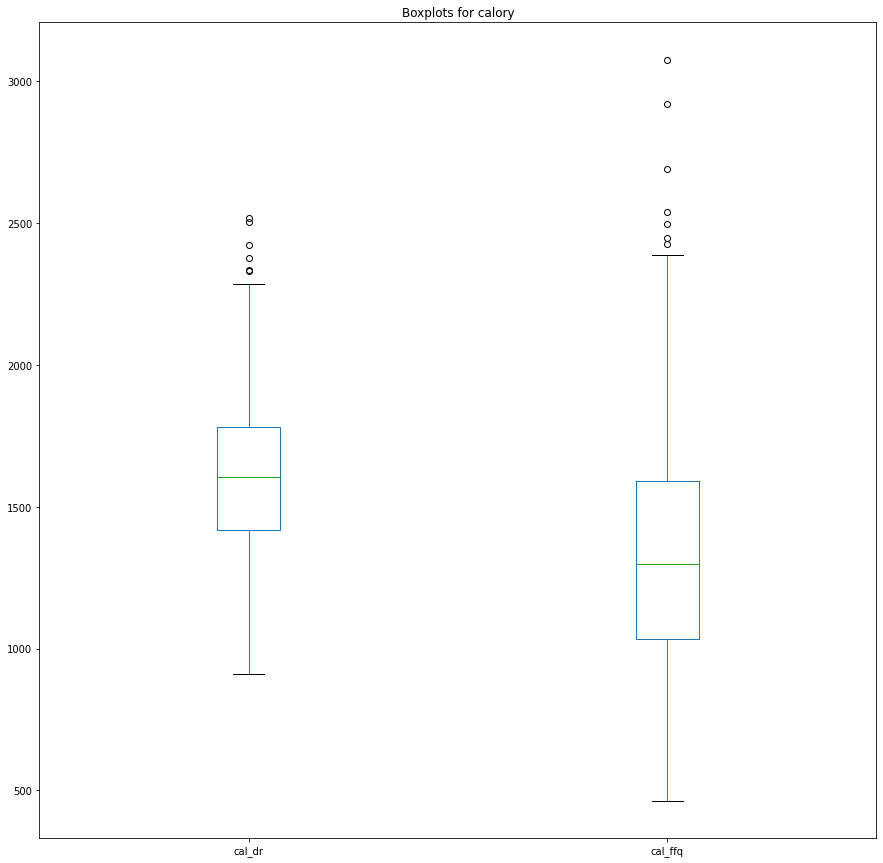

In [175]:
axis = Nutrition[Nutrition.columns[7:]].plot(kind='box', title='Boxplots for calory', figsize=(15, 15))

## b-

In [182]:
Nutrition.columns

Index(['Id', 'sfat_dr', 'sfat_ffq', 'tfat_dr', 'tfat_ffq', 'alco_dr', 'alco_ffq', 'cal_dr', 'cal_ffq'], dtype='object')

DR.vs.FFQ scatterplots for alchohol, sfat, tfat, and calories


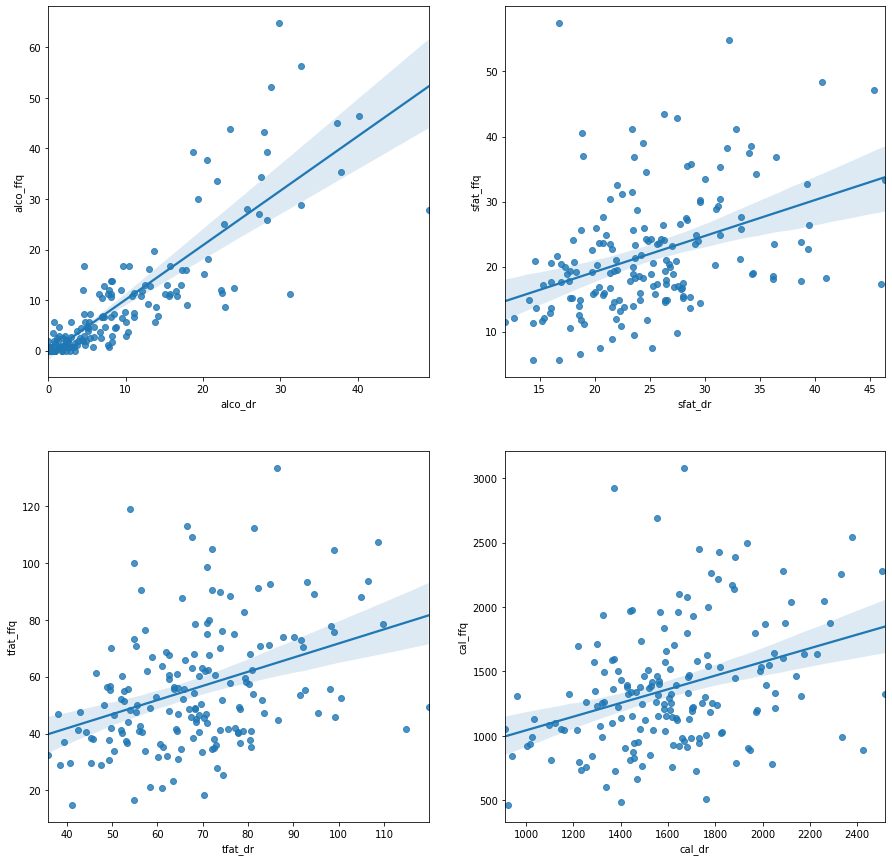

In [191]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
print('DR.vs.FFQ scatterplots for alchohol, sfat, tfat, and calories')
sns.regplot(x='alco_dr', y='alco_ffq', data=Nutrition, ax=axes[0,0])
sns.regplot(x='sfat_dr', y='sfat_ffq', data=Nutrition, ax=axes[0,1])
sns.regplot(x='tfat_dr', y='tfat_ffq', data=Nutrition, ax=axes[1,0])
sns.regplot(x='cal_dr', y='cal_ffq', data=Nutrition, ax=axes[1,1])

**Conclusion**

The scatterplots shown above seem
to suggest that the DR and FFQ values are not highly related. If FFQ were a perfect substitute for DR, the points would line up in a linear fashion. If the two were
unrelated, then it would be expected to see a random pattern in each panel. 

## c-

In [226]:
Quartiles = Nutrition[Nutrition.columns[1:]].quantile([.2, .4, .6, .8, 1]).T
Quartiles

,0.2,0.4,0.6,0.8,1.0
sfat_dr,18.806,22.59,26.024,29.482,46.36
sfat_ffq,14.840,18.28,21.960,27.660,57.40
tfat_dr,54.070,64.33,70.988,80.532,119.83
tfat_ffq,38.120,47.08,56.340,73.040,133.50
alco_dr,0.870,4.10,8.092,15.654,49.15
alco_ffq,0.760,2.57,6.656,12.882,64.75
cal_dr,1369.800,1532.20,1671.800,1874.800,2518.00
cal_ffq,980.580,1209.26,1387.300,1703.540,3077.30


In [236]:
dr_ffq = [('sfat_dr', 'sfat_ffq'), ('tfat_dr', 'tfat_ffq'), ('alco_dr', 'alco_ffq'), ('cal_dr', 'cal_ffq')]
Quarts = {}
Quartile_columns = [0, .2, .4, .6, .8, 1]
for dr, ffq in dr_ffq:
    Quarts[(dr, ffq)] = np.zeros(shape=(5,5))
    for i, q in  enumerate(Quartile_columns):
        for j, Q in enumerate(Quartile_columns):            
            Quarts[(dr, ffq)][i,j] = Nutrition[((Nutrition[dr]<=Quartiles[q].loc[dr]) & (Nutrition[dr]<=Quartiles[q].loc[dr]))
                                                 & ((Nutrition[ffq]<=Quartiles[Q].loc[ffq]))].count().Id
    print('\n\n%s vs %s quartiles'%(dr,ffq),'\n',Quarts[(dr, ffq)])




sfat_dr vs sfat_ffq quartiles 
 [[ 15.  23.  32.  34.  35.]
 [ 24.  38.  53.  62.  69.]
 [ 29.  50.  73.  91. 104.]
 [ 34.  65.  94. 121. 138.]
 [ 35.  69. 104. 138. 173.]]


tfat_dr vs tfat_ffq quartiles 
 [[ 13.  22.  30.  35.  36.]
 [ 22.  36.  51.  64.  69.]
 [ 26.  50.  73.  93. 104.]
 [ 33.  63.  89. 118. 138.]
 [ 35.  69. 104. 138. 173.]]


alco_dr vs alco_ffq quartiles 
 [[ 31.  33.  35.  35.  35.]
 [ 48.  61.  69.  69.  69.]
 [ 50.  71.  93. 103. 104.]
 [ 50.  72. 104. 129. 138.]
 [ 50.  72. 104. 138. 173.]]


cal_dr vs cal_ffq quartiles 
 [[ 10.  21.  29.  33.  35.]
 [ 21.  36.  53.  63.  69.]
 [ 26.  49.  73.  91. 104.]
 [ 30.  61.  92. 116. 138.]
 [ 35.  69. 104. 138. 173.]]


## d-

,tfat_ffq,tfat_dr
count,173.000000,173.000000
mean,56.076879,68.615376
std,21.970692,16.290839
min,14.800000,35.900000
25%,40.800000,56.160000
50%,51.700000,68.280000
75%,68.000000,77.980000
max,133.500000,119.830000


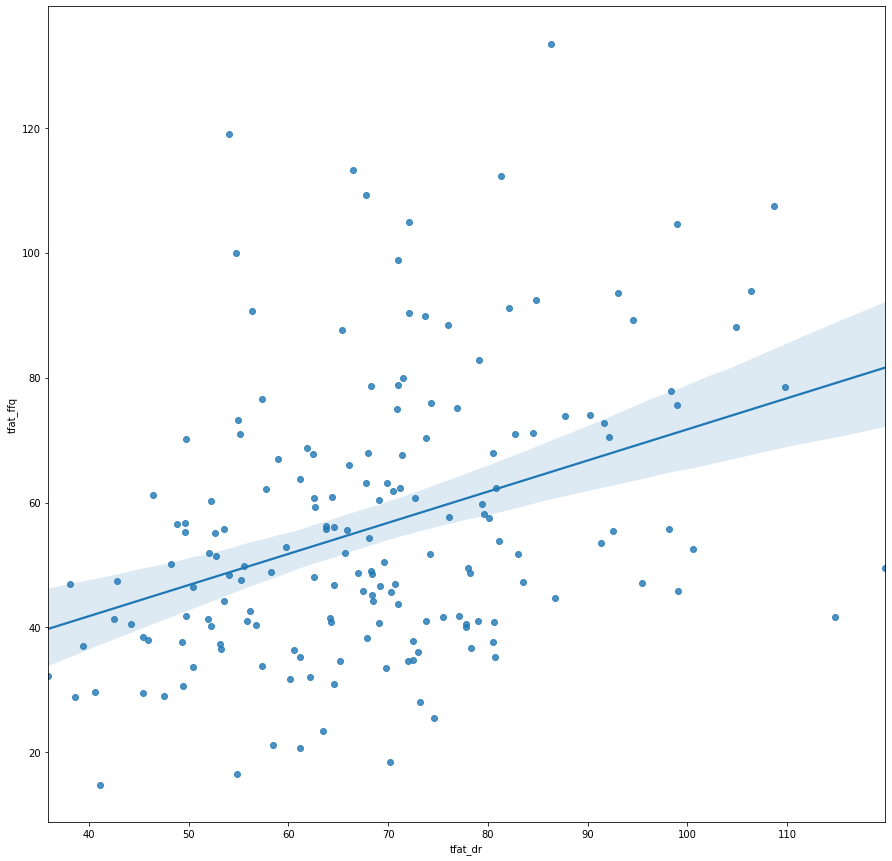

In [246]:
fig, ax= plt.subplots(figsize=(15,15))
sns.regplot(x='tfat_dr', y='tfat_ffq', data=Nutrition, ax=ax)
Nutrition[['tfat_ffq', 'tfat_dr']].describe(include='all')